In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import Markdown as md
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
def day(n):
    return datetime(2020, 2, 3) + timedelta(n)

In [3]:
rundf = pd.read_csv('results/'+
    'SIsaR_0.9.5.4 experiments 2 seeds-tableChangeworld_1000_basic_control_schoolOnSept.csv',
                    sep=',',skiprows=6)
case="# select 1000 epidemics with non-pharmaceutical containment measures, "+\
          "schools open in Sep, changing world, using checkpoints"
md(case)

# select 1000 epidemics with non-pharmaceutical containment measures, schools open in Sep, changing world, using checkpoints

In [4]:
rundf.replace(-1, np.nan, inplace=True)

In [5]:
rundf["totalInfected"]=rundf["cumulativeRedCount"]+rundf["cumulativeVioletCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]

rundf["cp1totalInfected"]=rundf["cp1cRed"]+rundf["cp1cViolet"]
rundf["cp1totalInfected&Deceased"]=rundf["cp1totalInfected"]+rundf["cp1cDead"]

rundf["cp2totalInfected"]=rundf["cp2cRed"]+rundf["cp2cViolet"]
rundf["cp2totalInfected&Deceased"]=rundf["cp2totalInfected"]+rundf["cp2cDead"]

rundf["cp3totalInfected"]=rundf["cp3cRed"]+rundf["cp3cViolet"]
rundf["cp3totalInfected&Deceased"]=rundf["cp3totalInfected"]+rundf["cp2cDead"]

rundf["cp4totalInfected"]=rundf["cp4cRed"]+rundf["cp4cViolet"]
rundf["cp4totalInfected&Deceased"]=rundf["cp4totalInfected"]+rundf["cp4cDead"]

rundf["cp5totalInfected"]=rundf["cp5cRed"]+rundf["cp5cViolet"]
rundf["cp5totalInfected&Deceased"]=rundf["cp5totalInfected"]+rundf["cp5cDead"]

rundf["cp6totalInfected"]=rundf["cp6cRed"]+rundf["cp6cViolet"]
rundf["cp6totalInfected&Deceased"]=rundf["cp6totalInfected"]+rundf["cp6cDead"]

In [6]:
rundf.columns

Index(['[run number]', 'run#', '[step]', 'seed0', 'seed', 'seedD', 'cp1cRed',
       'cp1cRedNH', 'cp1cViolet', 'cp1cVioletNH', 'cp1cDead', 'cp2cRed',
       'cp2cRedNH', 'cp2cViolet', 'cp2cVioletNH', 'cp2cDead', 'cp3cRed',
       'cp3cRedNH', 'cp3cViolet', 'cp3cVioletNH', 'cp3cDead', 'cp4cRed',
       'cp4cRedNH', 'cp4cViolet', 'cp4cVioletNH', 'cp4cDead', 'cp5cRed',
       'cp5cRedNH', 'cp5cViolet', 'cp5cVioletNH', 'cp5cDead', 'cp6cRed',
       'cp6cRedNH', 'cp6cViolet', 'cp6cVioletNH', 'cp6cDead',
       'cumulativeRedCount', 'cumulativeVioletCount', 'cumulativeDeadCount',
       'ticks', 'TinfSch', 'SinfSch', 'TinfNotSch', 'SinfNotSch',
       'totalInfected', 'totalInfected&Deceased', 'cp1totalInfected',
       'cp1totalInfected&Deceased', 'cp2totalInfected',
       'cp2totalInfected&Deceased', 'cp3totalInfected',
       'cp3totalInfected&Deceased', 'cp4totalInfected',
       'cp4totalInfected&Deceased', 'cp5totalInfected',
       'cp5totalInfected&Deceased', 'cp6totalInfected',
  

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
rLim=1200

In [9]:
tmp=rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [10]:
print (tmp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cp1cRedNH &  cumulativeRedCount &  totalInfected\&Deceased &   ticks \\
\midrule
count &     973.00 &             1000.00 &                 1000.00 & 1000.00 \\
mean  &       1.82 &              348.58 &                  861.64 &  279.50 \\
std   &       4.49 &              367.47 &                  913.46 &  210.08 \\
min   &       0.00 &                0.00 &                    2.00 &   12.00 \\
25\%   &       0.00 &               10.00 &                   22.00 &   94.00 \\
50\%   &       0.00 &              126.00 &                  309.50 &  159.00 \\
75\%   &       1.00 &              733.00 &                 1825.00 &  475.00 \\
max   &      34.00 &             1141.00 &                 2807.00 &  935.00 \\
\bottomrule
\end{tabular}



The output is included within:  
\begin{table}[htbp] or [H]

... output above ...

\label{a label}  
\caption{a caption}  
\end{table}


# Select at cp2 (actual cumulative value, using symptomatic only,  $\approx$ 33.3, implicitly with *nan* as 0)

In [11]:
# existing epidemic a cp2 with .notnull() NB, the opposit1 is .isnull()
rundf[rundf['cp2cRed'].notnull()]['ticks'].describe().loc['count']

627.0

In [12]:
rundf[rundf['cp2cRed'].notnull()][['cp2cRed','cp2totalInfected&Deceased']].describe()

,cp2cRed,cp2totalInfected&Deceased
count,627.00,627.00
mean,131.06,316.81
std,108.41,257.06
min,4.00,13.00
25%,44.50,98.00
50%,104.00,266.00
75%,193.00,463.50
max,646.00,1485.00


In [13]:
rundf[rundf['cp2cRed']>0]\
     [['cp2cRed','cp2totalInfected&Deceased']].describe()
# with data of epidemics that would have ended without New Start

,cp2cRed,cp2totalInfected&Deceased
count,627.00,627.00
mean,131.06,316.81
std,108.41,257.06
min,4.00,13.00
25%,44.50,98.00
50%,104.00,266.00
75%,193.00,463.50
max,646.00,1485.00


In [14]:
rundf['cp2GT70']=rundf['cp2cRed'] > 70
rundf[rundf.cp2GT70][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,392.00,392.00,392.00
mean,188.84,457.06,431.52


In [15]:
rundf['cp2LE70']=rundf['cp2cRed'] <= 70
rundf[rundf.cp2LE70][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,235.00,235.00,235.00
mean,34.69,82.87,345.13


In [16]:
rundf['cp2GT10']=rundf['cp2cRed'] > 10
rundf[rundf.cp2GT10][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,599.00,599.00,599.00
mean,136.82,330.77,404.83


In [17]:
rundf['cp2LE10']=rundf['cp2cRed'] <= 10
rundf[rundf.cp2LE10][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,28.00,28.00,28.00
mean,7.93,18.32,277.32


In [18]:
rundf['realistic_cp2']=rundf['cp2GT10'] & rundf['cp2LE70']
rundf[rundf.realistic_cp2][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,207.00,207.00,207.00
mean,38.30,91.60,354.30


# Select at cp3 (actual cumulative value, using symptomatic only,  $\approx$ 57.4, implicitly with *nan* as 0)

In [19]:
# existing epidemic a cp3 with .notnull() NB, the opposit1 is .isnull()
rundf[rundf['cp3cRed'].notnull()]['ticks'].describe().loc['count']

456.0

In [20]:
rundf['cp3GT90']=rundf['cp3cRed'] > 90 
rundf[rundf.cp3GT90][['cp3cRed','cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp3cRed,cp3totalInfected&Deceased,ticks
count,439.00,439.00,439.00
mean,414.48,1043.18,493.15


In [21]:
rundf['cp3LE90']=rundf['cp3cRed'] <= 90 
rundf[rundf.cp3LE90][['cp3cRed','cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp3cRed,cp3totalInfected&Deceased,ticks
count,17.00,17.00,17.00
mean,59.65,166.76,496.76


In [22]:
rundf['cp3GT20']=rundf['cp3cRed'] > 20 
rundf[rundf.cp3GT20][['cp3cRed','cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp3cRed,cp3totalInfected&Deceased,ticks
count,456.00,456.00,456.00
mean,401.25,1010.51,493.28


In [23]:
rundf['cp3LE20']=rundf['cp3cRed'] <= 20 
rundf[rundf.cp3LE20][['cp3cRed','cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp3cRed,cp3totalInfected&Deceased,ticks
count,0.00,0.00,0.00
mean,nan,nan,nan


In [24]:
rundf['realistic_cp2_cp3']=rundf['realistic_cp2'] & rundf['cp3LE90'] & rundf['cp3GT20']

In [25]:
rundf[rundf.realistic_cp2_cp3][['cp2cRed','cp2totalInfected&Deceased','cp3cRed',
                                'cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,cp3cRed,cp3totalInfected&Deceased,ticks
count,17.00,17.00,17.00,17.00,17.00
mean,37.88,112.18,59.65,166.76,496.76


# Considering cp4 (actual cumulative value, using symptomatic and asymptomatic cases,  $\approx$ 200.0)

In [26]:
rundf[rundf.realistic_cp2_cp3][['cp4cRed',
                                'cp4totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp4cRed,cp4totalInfected&Deceased,ticks
count,13.00,13.00,17.00
mean,504.31,1267.62,496.76


In [27]:
selectedrundf=rundf[rundf.realistic_cp2_cp3]

In [33]:
selectedrundf                 [['cp4cRed',
                                'cp4totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean','std']]

,cp4cRed,cp4totalInfected&Deceased,ticks
count,13.00,13.00,17.00
mean,504.31,1267.62,496.76
std,309.06,740.26,192.35


In [29]:
md("# ------------------------------------------------------------\n"+\
    "# timeFunction displaying heat-maps and interval data\n"+\
    "### with the possibility of choosing the duration column (after a merge), if any\n"+\
    "# ------------------------------------------------------------")

# ------------------------------------------------------------
# timeFunction displaying heat-maps and interval data
### with the possibility of choosing the duration column (after a merge), if any
# ------------------------------------------------------------

In [30]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import seaborn as sns; sns.set()

def timeFunction(rundf,day0,day1,durationCol,title):
    
    rundfHere=rundf.copy()
    rundfHere=rundfHere[rundfHere[durationCol]>=day0]
    rundfHere=rundfHere[rundfHere[durationCol]<=day1]
    
    display(md ("## Epidemics with duration between {} days ({}) and {} days ({})"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"))) )
    
    
    rundfHere.rename(columns={'cumulativeRedCount': 'symptomatic',
                              'ticks':"duration"},inplace=True)
    
    tmp=rundfHere[['symptomatic','totalInfected&Deceased','duration']].describe();
    display(tmp)
    display(print(tmp.to_latex()))
    
    if rundfHere.shape[0] == 0: return
    
    for nBins in [10,20,30,60]:
        display(md ("## Epidemics with duration between {} days ({}) and {} days ({}), with {} bins"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"),nBins)) )
            
        rundfHere['totalInfected&Deceased'].plot.hist(bins=nBins, color="r",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()
        rundfHere['duration'].plot.hist(bins=nBins, color="g",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()

        # preparing data for the heat-map
        hist = plt.hist2d(x=rundfHere['duration'], y=rundfHere['totalInfected&Deceased'], 
                          bins=nBins, range=[[0, rLim], [0, 3600]])
        plt.close() #to avoid the output of hist2d
        
        zMax=np.amax(hist[0]) # max level z axis
        display(md ("With {} bins, the max value on z axis is {}, first row is {}"\
                    .format(nBins,zMax,np.transpose(hist[0])[0])))
        
        if nBins == 60: plt.figure(figsize=(20,10))
        else:           plt.figure(figsize=(8.5,4.25))
        
        lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
        ax = sns.heatmap(
            np.flip(np.transpose(hist[0]),0), 
            #robust=True, 
            norm=lognorm,
            cmap='YlGnBu',
            annot=True, fmt='.0f', 
            xticklabels=np.round(hist[1][1:],0).astype(int),
            yticklabels=np.flip(hist[2][1:],0).astype(int),
            annot_kws={"size":8}
            )

        plt.xlabel("Days")
        plt.ylabel("Total symptomatic + asymptomatic + deceased")

        plt.title(title)

        plt.show()


In [31]:
#checkpoint names
start = 0
end=rLim
cp1=[1, 30,"cp1cRed","cp1totalInfected&Deceased"]
cp2=[2,119,"cp2cRed","cp2totalInfected&Deceased"]
cp3=[3,230,"cp3cRed","cp3totalInfected&Deceased"]
cp4=[4,316,"cp4cRed","cp4totalInfected&Deceased"]
cp5=[5,364,"cp5cRed","cp5totalInfected&Deceased"]
cp6=[6,453,"cp6cRed","cp6totalInfected&Deceased"]

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18)

,symptomatic,totalInfected&Deceased,duration
count,17.00,17.00,17.00
mean,471.06,1178.29,496.76
std,365.50,884.81,192.35
min,31.00,63.00,246.00
25%,78.00,251.00,317.00
50%,609.00,1573.00,531.00
75%,792.00,1990.00,600.00
max,927.00,2179.00,935.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &        17.00 &                   17.00 &     17.00 \\
mean  &       471.06 &                 1178.29 &    496.76 \\
std   &       365.50 &                  884.81 &    192.35 \\
min   &        31.00 &                   63.00 &    246.00 \\
25\%   &        78.00 &                  251.00 &    317.00 \\
50\%   &       609.00 &                 1573.00 &    531.00 \\
75\%   &       792.00 &                 1990.00 &    600.00 \\
max   &       927.00 &                 2179.00 &    935.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18), with 10 bins

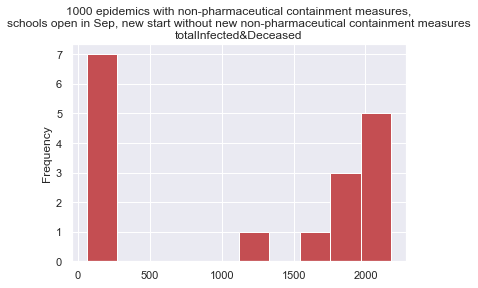

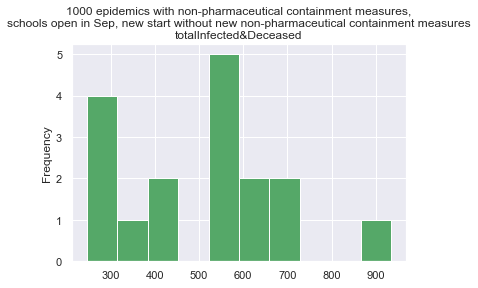

With 10 bins, the max value on z axis is 5.0, first row is [0. 0. 5. 2. 0. 0. 0. 0. 0. 0.]

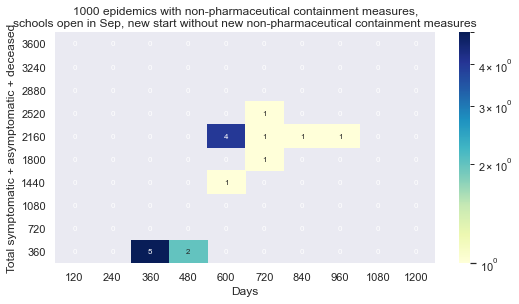

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18), with 20 bins

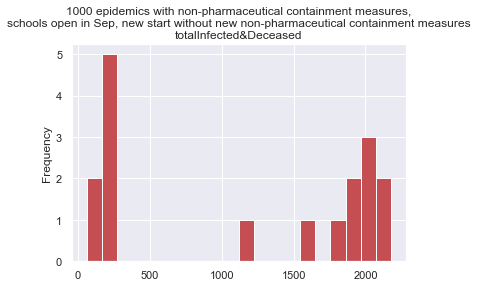

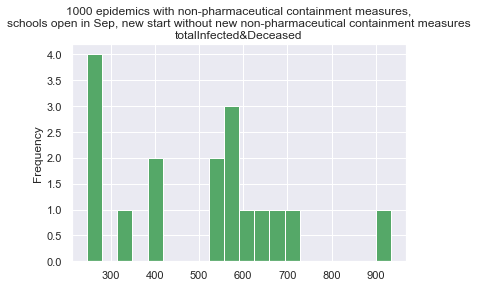

With 20 bins, the max value on z axis is 3.0, first row is [0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

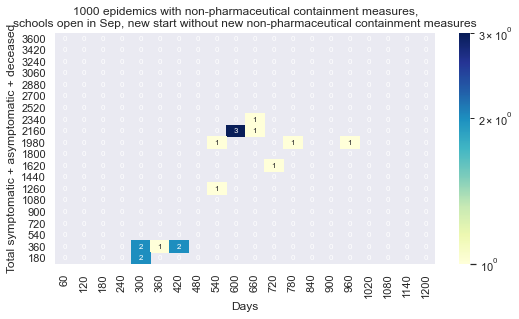

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18), with 30 bins

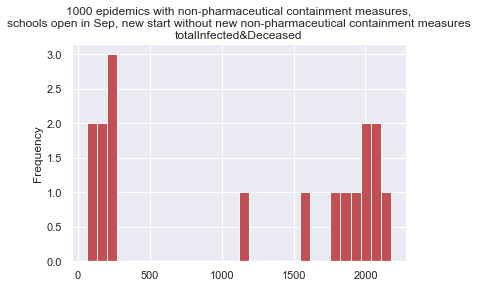

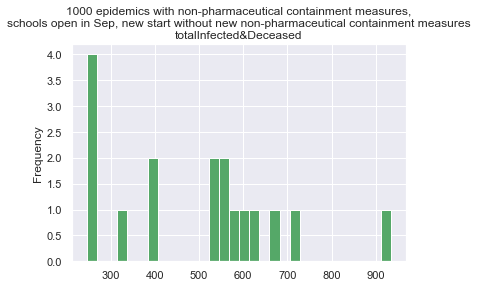

With 30 bins, the max value on z axis is 2.0, first row is [0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

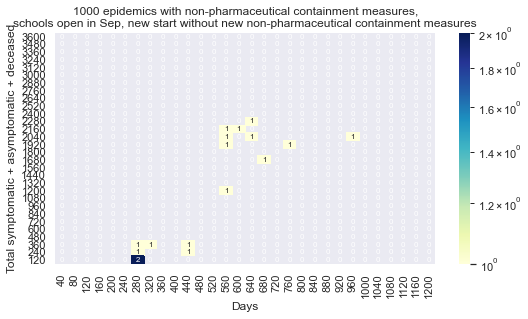

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18), with 60 bins

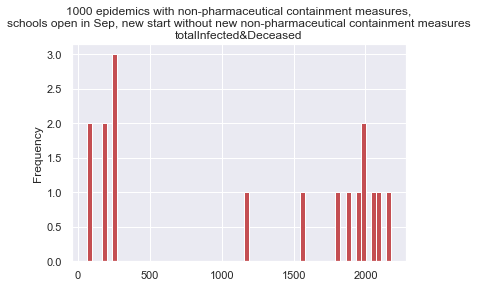

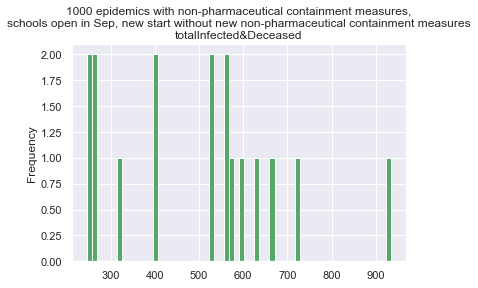

With 60 bins, the max value on z axis is 1.0, first row is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

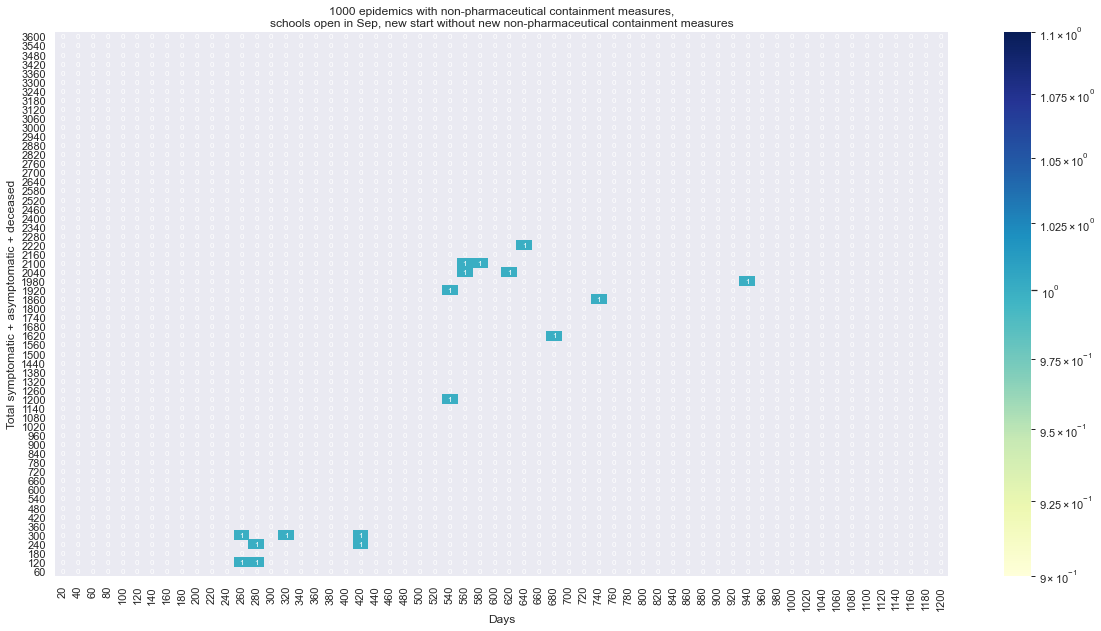

In [32]:
timeFunction(selectedrundf,start,end,"ticks",'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep, new start without new non-pharmaceutical containment measures')